In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Customers Dataset

## 1.  Load and overview
Load `Customers` dataframe and overview it.

In [2]:
customers = pd.read_csv('customers.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9189 entries, 0 to 9188
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9189 non-null   int64 
 1   age              9189 non-null   int64 
 2   gender           8874 non-null   object
 3   email            9012 non-null   object
 4   business_nature  8978 non-null   object
 5   company          8906 non-null   object
 6   position         8914 non-null   object
 7   payment_method   5865 non-null   object
 8   name             9189 non-null   object
 9   targets          9104 non-null   object
dtypes: int64(2), object(8)
memory usage: 718.0+ KB


In [3]:
customers.head()

,id,age,gender,email,business_nature,company,position,payment_method,name,targets
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,John__melgarejo,20670.07;20632.81;20722.58;20332.79;20662.55
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,William___kerne,31551.75;32431.83
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,James___kadner,21686.08;21282.62;21566.40
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,Charles__MUHL,26055.26;26039.48;25986.92
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,george___baridon,15950.31


## 2. Warmup
Split the `name` column to two seperate columns - `first_name` and `last_name`, as well as capitalizing them.

In [4]:
customers[['first_name', 'last_name']] = customers['name'].str.split('_').apply(lambda x: [x[0].capitalize(), x[-1].capitalize()]).to_list()
customers.drop('name', axis=1, inplace=True)
customers.head()

,id,age,gender,email,business_nature,company,position,payment_method,targets,first_name,last_name
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,20670.07;20632.81;20722.58;20332.79;20662.55,John,Melgarejo
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,31551.75;32431.83,William,Kerne
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,21686.08;21282.62;21566.40,James,Kadner
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,26055.26;26039.48;25986.92,Charles,Muhl
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,15950.31,George,Baridon


Add targets Mean, SD and Count features to the data frame.

In [5]:
customers['target_mean'] = customers['targets'].str.split(';', expand=True).astype(float).mean(axis=1)
customers['target_sd'] = customers['targets'].str.split(';', expand=True).astype(float).std(axis=1)
customers['target_count'] = customers['targets'].str.split(';', expand=True).astype(float).count(axis=1)
customers.head()


,id,age,gender,email,business_nature,company,position,payment_method,targets,first_name,last_name,target_mean,target_sd,target_count
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,20670.07;20632.81;20722.58;20332.79;20662.55,John,Melgarejo,20604.16,155.112311,5
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,31551.75;32431.83,William,Kerne,31991.79,622.310536,2
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,21686.08;21282.62;21566.40,James,Kadner,21511.70,207.217423,3
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,26055.26;26039.48;25986.92,Charles,Muhl,26027.22,35.781554,3
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,15950.31,George,Baridon,15950.31,NaN,1


## 3. Data exploration

A quick statistical view of the numeric columns reveals odd variation in the `target_mean` values.

In [6]:
customers.describe()

,id,age,target_mean,target_sd,target_count
count,9189.000000,9189.000000,9.104000e+03,7233.000000,9189.000000
mean,4594.000000,34.411906,1.394576e+05,265.586626,2.956579
std,2652.780145,10.177313,1.039534e+07,275.442002,1.440357
min,0.000000,18.000000,-1.950875e+03,0.035355,0.000000
25%,2297.000000,26.000000,1.859656e+04,119.736073,2.000000
50%,4594.000000,33.000000,2.429910e+04,203.174600,3.000000
75%,6891.000000,41.000000,3.387623e+04,323.515495,4.000000
max,9188.000000,64.000000,9.918983e+08,7156.861078,5.000000


BoxPlotting `target_mean` implies atleast one **mega outlier**, could be a result of a bad sample. 

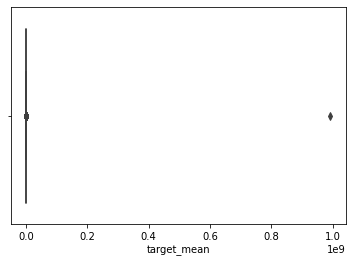

In [7]:
sns.boxplot(x=customers['target_mean']);

Let us check for positive outlier(s) numerically:

In [8]:
customers['target_mean'].nlargest()

8419    9.918983e+08
7129    7.194920e+05
7131    4.279392e+05
3948    4.261088e+05
457     4.149380e+05
Name: target_mean, dtype: float64

We notice that the top value, that is, the one at row `8418` is indeed the "massive outlier" seen in the boxplot above. Consider the 2nd largest value as well, which is at row `7129`. It's almost twice as large than the values before it, making it a potential outlier as well.

Plotting again without these rows yields the following BoxPlot and histogram: (Note that we didn't drop them inplace, as dropping outliers should be done with the dedicated `DataCleaner` class later on.

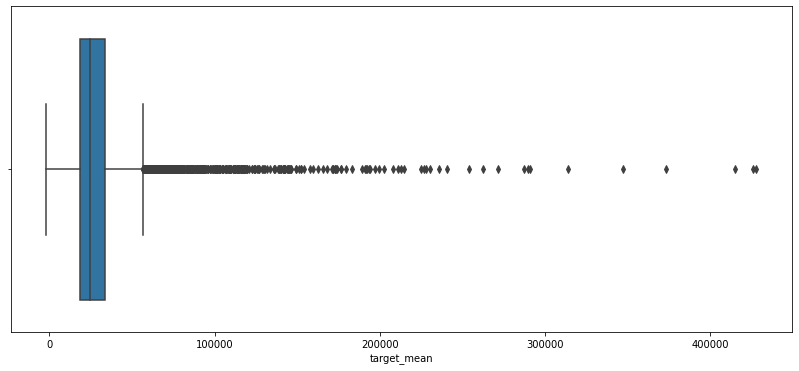

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(x=customers.drop([8419, 7129])['target_mean']);

Because of its continuous nature, it might be tempting to think that `target_mean` has an exponential or log-normal distribution. However, it has some negative values (as seen below), making it impossible unless the minus signs were added by mistake. Unfortunately, we cannot tell if that was indeed a mistake, since no additional information was provided regarding `targets`.

In [10]:
customers['target_mean'].nsmallest(10)

3886   -1950.875000
9167   -1746.732500
5598   -1427.163333
9087   -1168.060000
3891   -1109.400000
3877   -1101.774000
8991    -944.956667
9078    -845.268000
9066    -818.904000
3869    -454.455000
Name: target_mean, dtype: float64

On the other hand, the `target_sd` feature seems to have a LogNormal distribution.

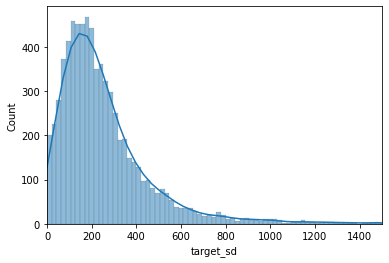

In [11]:
sns.histplot(x=customers['target_sd'], kde=True)
plt.xlim((0, 1500));

Looking at the histogram below, it looks like the number of targets for each individual has a *discrete uniform distribution* between 1 and 5. Formaly, we have  $X \sim U[1,5]$ where $X=$ `target_count`.

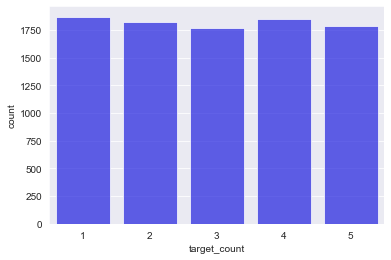

In [12]:
sns.set_style('darkgrid')
sns.countplot(x=customers['target_count'][customers['target_count']>0], color='blue', alpha=0.7);

Checking the `gender` distribution reveals greater amount of male customers.

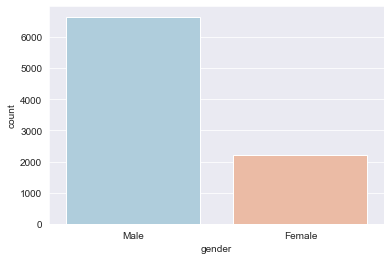

In [13]:
sns.countplot(x=customers['gender'], palette='RdBu_r');

Let us check the distribution of the `payment_method` feature. This column has a large amount of missing values, which will be classified as `NA` in the following countplot, having their own bar.<br>
The countplot reveals only 3 distinct payment methods. We can see a significant dominance in the `A` payment method compared to both `B` and `C`, which have simillar counts. The countplot also present the amount of missing values compared to the existing ones.

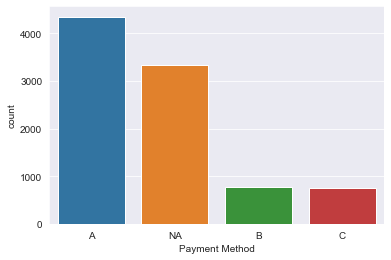

In [14]:
sns.countplot(x=customers['payment_method'].fillna('NA'))
plt.xlabel('Payment Method');

Now let us analyze `email`.<br>
We begin by checking the number of unique domains, along with a quick sample of all domains that start with `gmail`.

In [15]:
print(f'There are {customers.email.nunique()} unique domains.', '\n')
print(customers.email[customers.email.str.startswith('gmail', na=False)].unique())

There are 269 unique domains. 

['gmail.com' 'gmail.con' 'gmail.coom' 'gmail.co' 'gmail.com.hk' 'gmail.hk'
 'gmail.comm' 'gmail.xom']


Having 269 unique domains is suspicious. The `gmail` domain list suggests there are some problems in the data. While `com` and `hk` are reasonably different, there is no doubt that `con`, `comm`, `coom` and `xom` should be clustered together with `com`.
There are even more problems with this data, which seems to suffer from bad typos, such as a `gamil` domain, which probably should be also clustered with `gmail`.

Unfortunately, we do not have the required knowledge to make smart clustering (yet!) so we choose to make a new column named `provider`, which states only the domain's provider (e.g `gmail` rather than `gmail.xxx`). This way, we could handle the first clustering problem we've stated (`con`, `comm` etc), but not the second one (`gamil`). This limitation wouldn't bother us as long as we assume very low frequency of these cases.

In [16]:
customers.insert(loc=4, column='provider', value=customers.email.str.split('.', expand=True)[0])
customers.head()

,id,age,gender,email,provider,business_nature,company,position,payment_method,targets,first_name,last_name,target_mean,target_sd,target_count
0,0,26,Male,gmail.com,gmail,Communications,NaN,customer service officer,A,20670.07;20632.81;20722.58;20332.79;20662.55,John,Melgarejo,20604.16,155.112311,5
1,1,31,Male,ymail.com,ymail,Government,NaN,助理客戶服務主管,A,31551.75;32431.83,William,Kerne,31991.79,622.310536,2
2,2,26,Male,yahoo.com.hk,yahoo,Retail / Wholesale,NaN,店務員,A,21686.08;21282.62;21566.40,James,Kadner,21511.70,207.217423,3
3,3,52,Male,gmail.com,gmail,Other,NaN,MANAGER,NaN,26055.26;26039.48;25986.92,Charles,Muhl,26027.22,35.781554,3
4,4,22,Male,gmail.com,gmail,Retail / Wholesale,NaN,sales,A,15950.31,George,Baridon,15950.31,NaN,1


Plotting the 7 most popular providers, as well as calculating the percentages, implies that `gmail`, `yahoo` and `hotmail` are far more popular than the others.

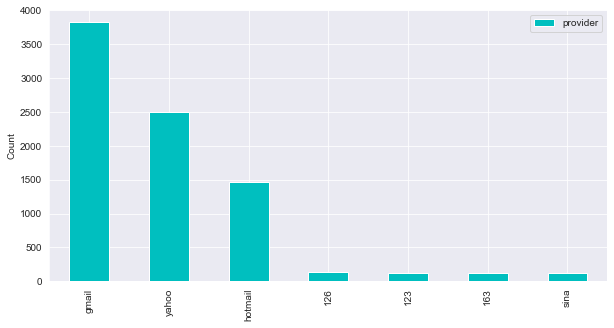

In [17]:
customers.provider.value_counts(False).reset_index().head(7).plot(x='index', y='provider', kind='bar', color='c', figsize=(10,5))
plt.xlabel('')
plt.ylabel('Count');


In [18]:
print('Top Ratios:\n\n', customers.provider.value_counts(normalize=True).head(5), '\n', sep='')
print(f'gmail, yahoo and hotmail provide {100 * round(customers.provider.value_counts(normalize=True).head(3).sum(), ndigits=4)}% of total domains.')

Top Ratios:

gmail      0.424212
yahoo      0.276853
hotmail    0.162228
126        0.014425
123        0.013205
Name: provider, dtype: float64

gmail, yahoo and hotmail provide 86.33% of total domains.


Moving on to the `age` column. We choose to plot a countplot rather than a histogram because `age` is discrete. <br>
Based on it, it looks like age has a *Poisson distribution*, namely $X \sim \text{Po}(\lambda)$, where $X=$ `age` for some $\lambda>0$.

Average Age: 34.41


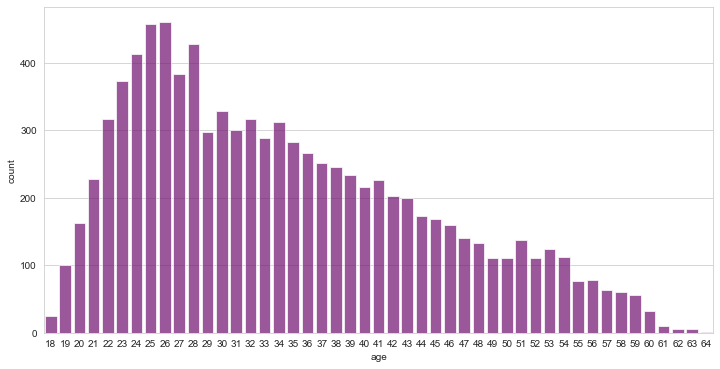

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x=customers['age'], color='purple', alpha=0.7)
print('Average Age:', round(customers['age'].mean(), 2))

Looking at the countplot below, it seems like `gender` doesn't affect the above distribution distribution.

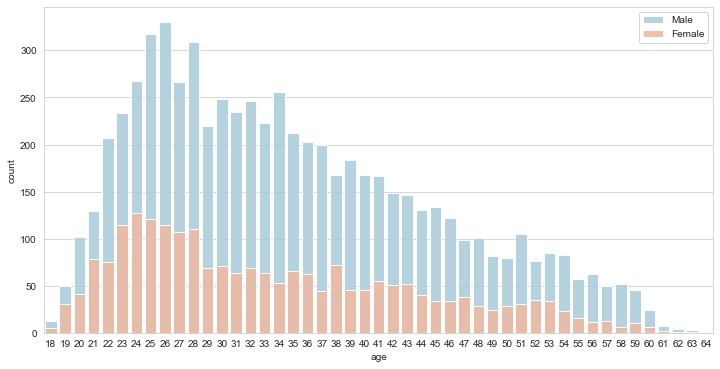

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', alpha=0.9, hue='gender', data=customers, dodge=False, palette='RdBu_r')
plt.legend(loc=1);

Moving on, the following plot reveals the distribution of the `business_nature` feature. <br>
Looking at the chart, it might be a good idea to assign the `other` value to the missing values for that feature.

<AxesSubplot:xlabel='count', ylabel='business_nature'>

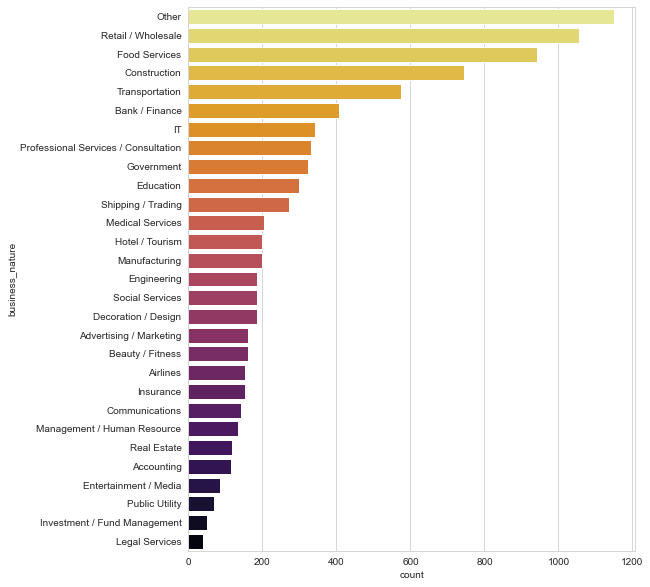

In [21]:
plt.figure(figsize=(8,10))
customers.business_nature.value_counts()
sns.countplot(y=customers['business_nature'], order=customers.business_nature.value_counts().index, palette='inferno_r')

Examing the `id` column, it seems like it is ranging from 0 to n along with the index. This makes it redundant and will be removed later on.

In [22]:
customers.id.describe()

count    9189.000000
mean     4594.000000
std      2652.780145
min         0.000000
25%      2297.000000
50%      4594.000000
75%      6891.000000
max      9188.000000
Name: id, dtype: float64

### Missing Values
Let us check for missing values, using a sophisticated heatmap.

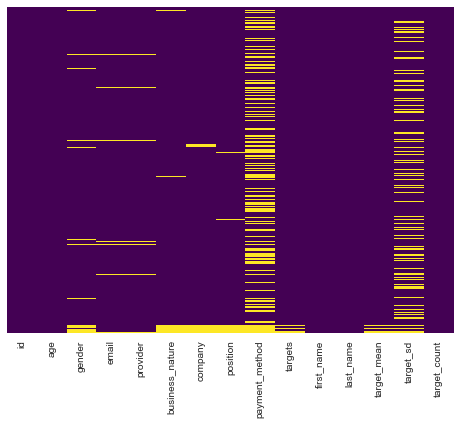

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(customers.isnull(), cmap='viridis', yticklabels=False, cbar=False);

In [24]:
print('Missing Values Rates:\n')
print(round(customers.isnull().mean()[customers.isnull().mean() > 0] * 100, 2).astype(str) + '%')

Missing Values Rates:

gender              3.43%
email               1.93%
provider            1.93%
business_nature      2.3%
company             3.08%
position            2.99%
payment_method     36.17%
targets             0.93%
target_mean         0.93%
target_sd          21.29%
dtype: object


Seemingly, `target_sd`'s nulls result from only one `targets` value (undefined std), those missing values are justified.
However, the `payment_method` nulls are too many and we will probably choose to drop this column or set the nulls to a fixed value. <br>
As for the other nulls in the data set, we can handle them in a variaty of ways, such as drop the rows with no gender info (Because there are only a few) or by setting the `null` values, as suggested with the payment method case.

As for the rows, we would like to drop rows with too many missing values, say more than 50%. There will be a dedicated method for that in the `DataCleaner` class.

An interesting approach for filling in missing values would be to *predict* them. Although this task would be relative hard here, as implied by the *correlation matrix* below.

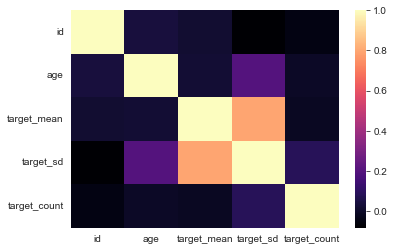

In [25]:
sns.heatmap(customers.corr(), cmap='magma');

The only high correlation we have is between `target_mean` and `target_sd`, but this correlation is trivial and won't be helpful to us at all.

## 4. Cleaning the data
Consider the `DataCleaner` class below. This class was built to help us with our cleaning process. <br>
One should notice that all methods occur in-place.

In [26]:
class DataCleaner:
    def __init__(self, df):
        '''Initiate a "DataCleaner" object. Pass in a DataFrame.'''
        self.df = df
        
    def rm_null_rows(self, p):
        '''Removes rows having at least 100*p percent null values'''
        assert (0 <= p <= 1), 'p should be between 0 and 1' 
        self.df = self.df[self.df.isnull().mean(axis=1) < p]
        return None
    
    def rm_outliers(self, col, q=0.999, mul=2):
        '''Removes values which are at least 'mul' times larger in absolute value than the 'q' quantile, given a dataframe column (col).
        q=0.999 and mul=2 by default, that is removing all the values which are more than two times larger than 99.9% of the other values.'''
        assert (0 <= q <= 1), 'q should be between 0 and 1'
        self.df = self.df[self.df[col].fillna(0) <= self.df[col].quantile(q) * mul]
        return None
    
    def rm_negatives(self, col):
        '''Removes all rows having negative values in the 'col' column.'''
        self.df =  self.df[self.df[col]>=0]
        return None
    
    def set_na(self, col, val=0):
        '''Sets all null values in the 'col' column to 'val'. '''
        df_copy = self.df.copy()
        df_copy[col] = self.df[col].fillna(val)
        self.df = df_copy
        return None
    
    def rm_na_except(self, *cols):
        '''Removes all na values in the dataframe, except for the specified column(s).
        Multiple columns should be passed as args'''
        self.df = self.df.dropna(subset=self.df.columns.difference([*cols]))
        return None
    
    def rm_dup_idx(self):
        '''Searches for a column which is a duplicate of the index column, and removes it'''
        for col in self.df.columns:
            if np.all(self.df.index == self.df[col]):
                self.df = self.df.drop(col, axis=1)
                
    def to_dollars(self, col, size='T'):
        '''Cleans a messy currency column featuring billions and Trillions and converts it to Billions.'''
        self.df[col] = self.df[col].astype(str).apply(self.__to_dollars_inside)
        return None
    
    def zero_fill(self, col):
        '''Apply the "zfill" method on a column, with number of zeroes as the length of the maximum instance in that column'''
        self.df[col] = self.df[col].str.zfill(self.df[col].apply(len).max())
        return None
    
    @staticmethod
    def __to_dollars_inside(val):
        '''This is a private method used in the to_dollars method'''
        if val.endswith('billion') or val.endswith('B'):
            return float(val.strip('Bbilion$'))
        elif val.endswith('T') or val.endswith('trillion'):
            return float(val.strip().strip('Ttrillion$')) * 1000
        else:
            return float(val)

        
        

Now let us initiate a `DataCleaner` object named `clean_customers`

In [27]:
clean_customers = DataCleaner(customers)

We begin by removing all the rows for which at least 50% of the features are missing, using the `rm_null_rows` method with `p=0.5`. We chose 50% because that is the point for which we believe we can no longer squeeze high quality information.

In [28]:
p = 0.5
clean_customers.rm_null_rows(p)
print(f'This procedure removed {customers.shape[0] - clean_customers.df.shape[0]} rows with at least {100*p}% missing features.')

This procedure removed 46 rows with at least 50.0% missing features.


We continue with outliers removal, using the `rm_outliers` method and using its default values. that is, removing all the values which are more than two times larger the 99.9% percentile. The rational behind this choosing is:
1. We have a large data set - Making the 99.9% percentile large enough.
2. The outlier(s) seen in the boxplot above were incredibly large, while no small (left) outliers were seen present.

Referring to item (3) again, we are expecting this method to remove 2 rows.

In [29]:
s = clean_customers.df.shape[0]
clean_customers.rm_outliers('target_mean')
print(f'This procedure removed {s - clean_customers.df.shape[0]} outliers.')

This procedure removed 2 outliers.


Indeed, 2 rows were removed. We now proceed to remove all negative values from the `target_mean` feature. This is because we only have:

In [30]:
tmp = clean_customers.df.target_mean < 0
print(tmp.sum(), ' negative targets, which are about ',
      round(tmp.sum()/tmp.count()*100, 2), '% of the total targets', sep='')

10 negative targets, which are about 0.11% of the total targets


In [31]:
clean_customers.rm_negatives('target_mean')

Using the `set_na` method, we now fill the `payment_method` nulls with a dedicated character `M`, which stands for "Missing". This choosing is reasonable since the possible methods are `A`, `B` and `C`.

Moreover, we set all missing values on the `business_nature` column to `Other`, as suggested in the previous item.

In [32]:
clean_customers.set_na('payment_method', 'M')
clean_customers.set_na('business_nature', 'Other')

Finally, we take a glimpse at the na heatmap again.

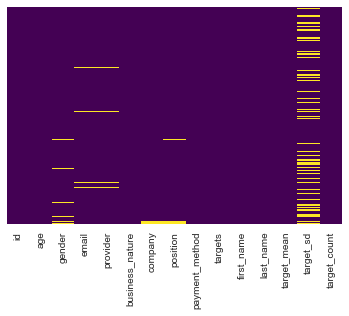

In [33]:
sns.heatmap(clean_customers.df.isnull(), cmap='viridis', yticklabels=False, cbar=False);

Based on it and ignoring `target_sd`, we have just a few rows with missing features so we choose to drop them altogether. We can do so easily without worrying about `target_sd` with the `rm_na_except` method. The rational behind leaving null `target_sd` values is that making them `0` will affect their true statistical nature, such as their mean, median, etc. Moreover, the std of one variable is undefined.

In [34]:
clean_customers.rm_na_except('target_sd')

Moving back to the `company` column, looking at the top 3 values reveals a redundent tab captures(`\t`). We can clean that column using the pandas built in `str.strip` method.

In [35]:
print('Before:\n', clean_customers.df.company.head(3), '\n')
clean_customers.df['company'] = clean_customers.df['company'].str.strip()
print('After:\n', clean_customers.df.company.head(3))

Before:
 9                \t Cuico Florist Limited
10    \tSincere Finance Holding Limited\t
11      \t TOPPAN FORMS (HONG KONG) GROUP
Name: company, dtype: object 

After:
 9               Cuico Florist Limited
10    Sincere Finance Holding Limited
11     TOPPAN FORMS (HONG KONG) GROUP
Name: company, dtype: object


As discussed in item (2), the `id` column is literally a duplicate of the index column and thus, redundent. Consider the `rm_dup_idx` method, used to look for a duplicate index column and remove it, without specifying a specific column!

In [36]:
clean_customers.rm_dup_idx()

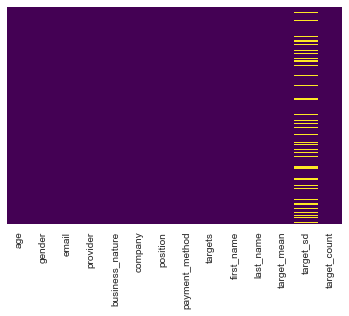

In [37]:
sns.heatmap(clean_customers.df.isnull(), cmap='viridis', yticklabels=False, cbar=False);

As for the `company`, `position` columns featuring Mandarin language - Non english values can be easily dropped using regex. However, these rows could be highly valueable to Mandarin readers, or after a translating it. This task, however, will not be done here. These values will be left in the dataframe, making them ready for further analysis, rather then dropped.

We conclude the cleaning proccess, let us update `customers`.

In [38]:
customers = clean_customers.df.reset_index(drop=True)

## 5. Additional data inference
While most of the inference took place in items (2,3), there are a few more things to notice.
For starters, we notice that men tend to have greater `target_mean` values:

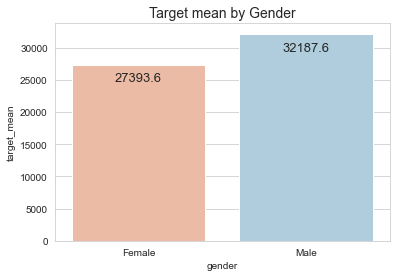

In [39]:
ax = sns.barplot(x='gender', y='target_mean', data=customers.groupby('gender')['target_mean'].mean().reset_index(), palette='RdBu')
ax.bar_label(ax.containers[0], size=13, padding=-20)
plt.title('Target mean by Gender', size=14);

Notice that a lot of the sampled share the same `last_name`. The quick assumption that these are different samples from the same people gets rejected as soon as we take a look at the `first_name` values. This implies many family related participants in our data.

In [40]:
customers.last_name.value_counts().head()

Muhl         819
Kerne        730
Helie        338
Melgarejo    337
Koerper      329
Name: last_name, dtype: int64

In [41]:
customers.first_name.value_counts().head()

Louis       51
Philip      48
Ike         48
Winfield    44
Harold      43
Name: first_name, dtype: int64

Investigating relations between numeric feature, like the table below:

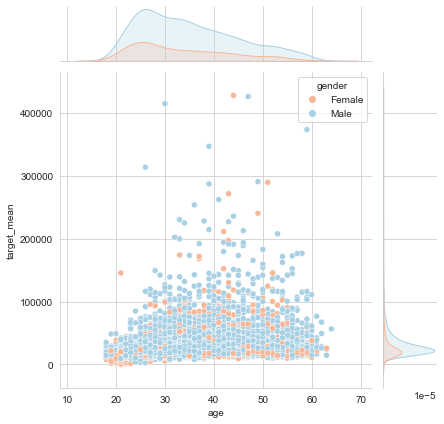

In [42]:
sns.jointplot(x='age', y='target_mean', hue='gender', data=customers, palette='RdBu');

Wouldn't say much, because of the low correlations presented in item(3). That being said, we conclude our inference.

## 6. Additional features
If one could scrape additional data from the web, the features I would seek for the given `customers` dataframe are:
1. A dictionary, which mapps the specific Mandarin values in both `company` and `position` columns.
2. A `country` feature, indicating where the sampled are from. This way we could group by country and infer even more - such as predicting whether certain countries ban a certain `payment_method`.
3. A `Seniority` feature, indicating the amount of time (in years) the sampled serves in his position.
4. A dummy `Married` feature (1 for married, 0 for not married)

While the 1st suggestion won't cause problems, fitting the `country` feature could be difficult. In other words, how can we tell determine a sampled country? maybe based on his Company's nationality? But what if this company is worldwide? Maybe based on the ending of the domain (such as 'hk') + `company` + `last_name`? It still isn't guarenteed at all.

In general, adding additional features is a relative hard task. That is because we don't have reference to existing assignments (labels). For example, we could try to predict the missing `payment_method` values based on the other features by looking at other samples and investigating the relations between this feature to the other features. However, when adding completely new features, we don't have labels so unless there is another source we can rely on, this task is problematic.

# Company Dataset

## 7. Data summary and Cleaning

In [43]:
companies = pd.read_excel('companies.xlsx')
companies

,company_id,name,domain,business_nature,employee_number,type,market_cap
0,"""00123122""",HSBC,www.hsbc.com/,banking,226059,public,78.45billion
1,878434523,AIA,www.aia.com,insurance,0,public,1.12T
2,3423656,MTR,http://www.mtr.com.hk/en/customer/main/index.html,Railway,28035,public,271B
3,452352,PCCW,http://www.pccw.com/,communications,22800,public,31.6001B
4,4342ff34,HKT,hkt.com,Telecom,"""15900.00""",public,$80.45B
5,534534,Manulife,https://www.manulife.com/,insurance,34000,public,$47.4 billion
6,232131,Cathay Pacific Airways,www.cathaypacific.com,airline,35000,public,$42.29 B
7,123555342,Hong Kong Police Force,https://www.police.gov.hk,law enforcement,36681,government,NaN
8,621621320,KPMG,home.kpmg,consulting,227000,NaN,NaN
9,998411df,HAECO,www.haeco.com,\tAerospace,16641,public,NaN


In [44]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_id       11 non-null     object
 1   name             11 non-null     object
 2   domain           11 non-null     object
 3   business_nature  11 non-null     object
 4   employee_number  11 non-null     object
 5   type             10 non-null     object
 6   market_cap       8 non-null      object
dtypes: object(7)
memory usage: 744.0+ bytes


We notice only 11 entries, all of them of type `object`. We begin by doing some cleaning tasks:
1. Convert the `employee_number` to `int`
1. Stripping `company_id` of `"`.
2. Stripping `business_nature` of `\t`.
3. Adding `domain_pure` feature for cleaner domain rather then a website address. Notice how we take care of (index 2) privately, because its more complex.
4. Setting (index 8) company `type` to public, because of its large amount of employees and the fact that most of the companies are public.

Notice how we don't concern ourselves about these specific cases nor building new methods for them because this data is small. As future data scientists, we need to dedicate our time for the important stuff.


In [45]:
companies['employee_number'] = companies.employee_number.astype(str).str.strip('""').astype(float).astype(int)
companies['company_id'] = companies.company_id.astype(str).str.strip('""')
companies['business_nature'] = companies.business_nature.str.strip()
companies.insert(3, 'domain_pure', companies.domain.str.rstrip('/').str.replace('http://www.|https://|www.|/en/customer/main/index.html', '', regex=True))
companies['type'] = companies['type'].fillna('public')

Now, for the more massive cleaning tasks, such as cleaning the `market_cap` feature and converting it to the same size (we choose billions), we initiate a new DataCleaner object and run the dedicated `to_dollars()` method. <br>
Also, consider the `zero_fill()` method, used to pad all the `company_id` entries with zeros in such a way that all of the ids will have the same minimal length. You can check the docstring for more information.

In [46]:
companies_c = DataCleaner(companies)
companies_c.to_dollars('market_cap')
companies_c.zero_fill('company_id')

In addition, there is no smart way to predict the `market_cap` for the missing entries, Hence we conclude our cleaning proccess with a quick look on our cleaned dataframe.

In [47]:
companies = companies_c.df
companies

,company_id,name,domain,domain_pure,business_nature,employee_number,type,market_cap
0,000123122,HSBC,www.hsbc.com/,hsbc.com,banking,226059,public,78.4500
1,878434523,AIA,www.aia.com,aia.com,insurance,0,public,1120.0000
2,003423656,MTR,http://www.mtr.com.hk/en/customer/main/index.html,mtr.com.hk,Railway,28035,public,271.0000
3,000452352,PCCW,http://www.pccw.com/,pccw.com,communications,22800,public,31.6001
4,04342ff34,HKT,hkt.com,hkt.com,Telecom,15900,public,80.4500
5,000534534,Manulife,https://www.manulife.com/,manulife.com,insurance,34000,public,47.4000
6,000232131,Cathay Pacific Airways,www.cathaypacific.com,cathaypacific.com,airline,35000,public,42.2900
7,123555342,Hong Kong Police Force,https://www.police.gov.hk,police.gov.hk,law enforcement,36681,government,NaN
8,621621320,KPMG,home.kpmg,home.kpmg,consulting,227000,public,NaN
9,0998411df,HAECO,www.haeco.com,haeco.com,Aerospace,16641,public,NaN


### Data Inference
We explore the `market_cap` along the companies who have this value.

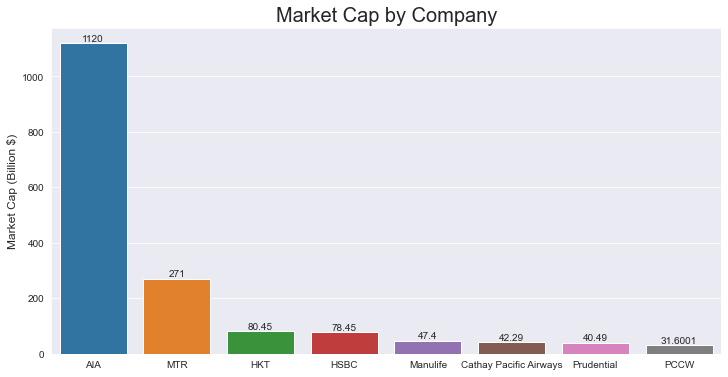

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='name',  y='market_cap', data=companies.sort_values('market_cap', ascending=False).dropna())
plt.title('Market Cap by Company', size=20)
plt.xlabel('')
plt.ylabel('Market Cap (Billion $)', size=12)
ax.bar_label(ax.containers[0]);

Ignoring the `employee_number` for the `A/A` company (which is obiously a mistake), we check for correlation between the amount of employees and the market cap:

In [49]:
companies.drop(1).corr()

,employee_number,market_cap
employee_number,1.000000,-0.052651
market_cap,-0.052651,1.000000


The correlation table above implies (almost) no connection between the two. for this reason, we can't predict the missing `employee_number` nor the missing `market_cap` values.
We end our inference here.

## 8. Missing Values and Outliers
While we already handled the missing `type` value, we see no point of filling the missing `market_cap` values.
We choose not to consider `A/A` as an outlier, even though it is problematic (and also has 0 employees). The reason for this is that 1.2T market cap is reasonable (Apple is estimated at 2.4T atm) and the fact that we only have a small amount of companies, making every little piece of information useful.

## 9 + 10. Aggregation
We begin by creating a subset of `customers`, which inludes all the companies in `companies`. <br>
We also create an empty dataframe `companies_agg` which will include all the desired aggregated features we choose.

In [50]:
cust_comp = customers[customers.company.isin(companies.name)]
companies_agg = pd.DataFrame()
cust_comp.head()

,age,gender,email,provider,business_nature,company,position,payment_method,targets,first_name,last_name,target_mean,target_sd,target_count
182,32,Male,123.com,123,Insurance,AIA,財務策劃,A,25973.69;25777.53,Noah,Brittin,25875.610000,138.706066,2
184,27,Male,gmail.com,gmail,Insurance,AIA,保險從業員,C,20663.90;21287.92;20578.57;21064.76,Thomas,Kerne,20898.787500,335.003661,4
185,38,Male,hotmail.com,hotmail,Insurance,AIA,Agent,A,53673.65,Norman,Bloeser,53673.650000,NaN,1
186,57,Male,gmail.com,gmail,Professional Services / Consultation,AIA,資深區域經理,M,88045.98;89205.93,Gilbert,Bloeser,88625.955000,820.208511,2
187,25,Male,gmail.com,gmail,Insurance,AIA,Finacial planner,A,17846.35;17937.26;17750.30,Fredrick,Araque,17844.636667,93.491775,3


In [51]:
print(f'This dataframe has {cust_comp.shape[0]} rows,')
print(f'And has {cust_comp.company.nunique()} unique companies as expected.')

This dataframe has 159 rows,
And has 11 unique companies as expected.


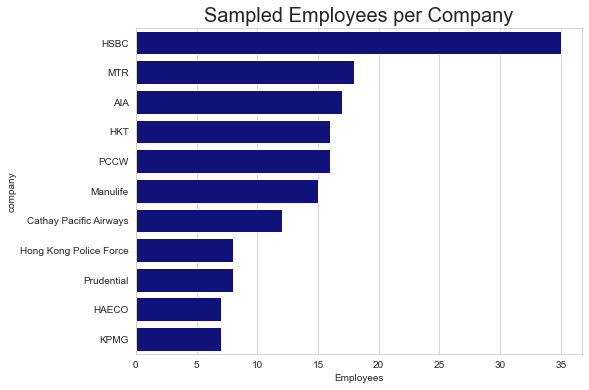

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(y=cust_comp.company.sort_values(), color='darkblue', order=cust_comp.company.value_counts().index)
plt.xlabel('Employees')
plt.title('Sampled Employees per Company', size=20);

The above plot confirms that `A/A` indeed has employees. We Choose to include this information in `companies_agg` under `sampled_employees` column.<br> 
We now check the average employee `age` per company. It seems that `HAECO` hiers mostly young people, while the HK police force feature older employees. We add this aggregation as well under `avg_employee_age`.

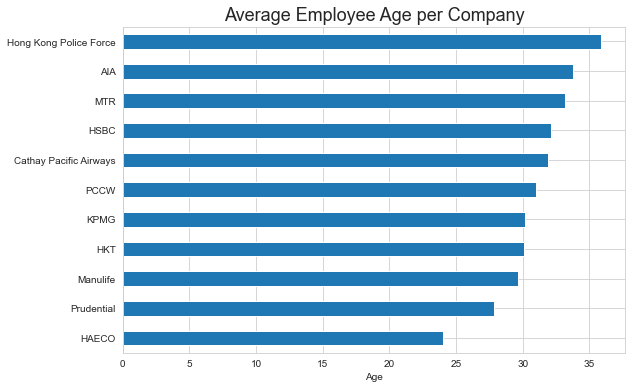

In [53]:
cust_comp.groupby('company')['age'].mean().sort_values().plot.barh(figsize=(9,6))
plt.title('Average Employee Age per Company', size=18)
plt.xlabel('Age')
plt.ylabel('');

In [54]:
companies_agg['sampled_employees'] = cust_comp.groupby('company')['age'].count()
companies_agg['avg_employee_age'] = round(cust_comp.groupby('company')['age'].mean(), 2)

We also check the range of the ages per company. Though, we are not interested of adding it to our aggregated dataframe.

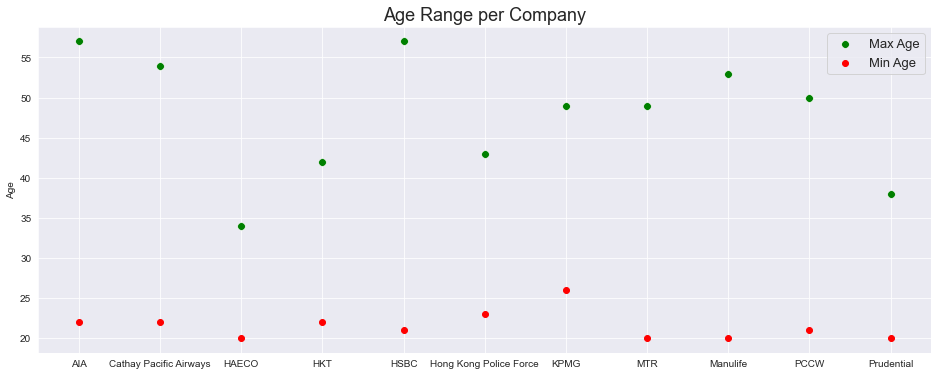

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
tmp = cust_comp.groupby('company')['age'].describe()[['min', 'max']].reset_index()
sns.scatterplot(x='company', y='max', data=tmp, label='Max Age', s=60, color='g')
plt.scatter(x=tmp['company'], y=tmp['min'], label='Min Age', color='r')
plt.xlabel('')
plt.ylabel('')
plt.legend(fontsize=13)
plt.title('Age Range per Company', size=18)
plt.ylabel('Age');

As for the average `target_mean` values per company, the barplot below illustrates the distribution very nicely. This is added to our aggregated dataframe under `avg_employee_target`. We also add the average `target_count` per company as `avg_target_count`.

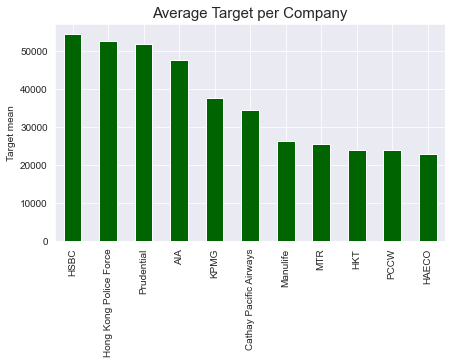

In [56]:
cust_comp.groupby('company')['target_mean'].mean().sort_values(ascending=False).plot.bar(figsize=(7,4), color='darkgreen')
plt.xlabel('')
plt.ylabel('Target mean')
plt.title('Average Target per Company', size=15);

In [57]:
companies_agg['avg_employee_target'] = round(cust_comp.groupby('company')['target_mean'].mean(), 2)
companies_agg['avg_target_count'] = round(cust_comp.groupby('company')['target_count'].mean(), 2)

We now plot the `payment_method` distribution along these companies. The distribution is close to the one we had on item(3) on all companies.

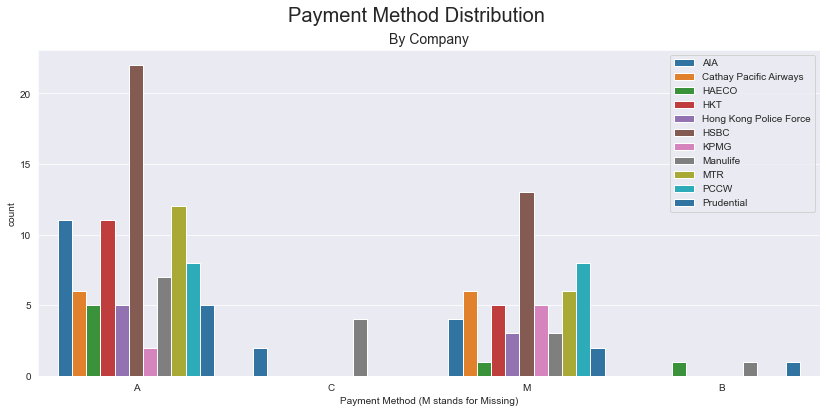

In [58]:
plt.figure(figsize=(14,6))
sns.countplot(x='payment_method', hue='company', data=cust_comp, dodge=True, palette='tab10',)
plt.legend(loc=1)
plt.suptitle('Payment Method Distribution', size=20)
plt.title('By Company', size=14)
plt.xlabel('Payment Method (M stands for Missing)');

We proceed by adding the most popular `payment_method` for each company under `common_payment_method`. on the special case when `M`==(`A` or `B`), The actual payment method will be chosen (either A or B). This was done using the `pd.Series.mode` method.

In [59]:
companies_agg['common_payment_method'] = cust_comp.groupby('company')['payment_method'].agg(lambda x: pd.Series.mode(x)[0])

We conclude our aggregation here. Let us pause and ponder at the aggregated dataframe's top values. <br>
Based on it, we choose to reset the index.

In [60]:
companies_agg.head(3)

,sampled_employees,avg_employee_age,avg_employee_target,avg_target_count,common_payment_method
company,,,,,
AIA,17,33.76,47506.96,3.06,A
Cathay Pacific Airways,12,31.92,34551.81,3.42,A
HAECO,7,24.00,23007.91,2.71,A


In [61]:
companies_agg.reset_index(inplace=True)

## 11. Combining the data

We now combine the aggregated DataFrame from the previous item with the `companies` dataset.
We call it `final_df`

In [62]:
final_df = companies.merge(companies_agg, left_on='name', right_on='company').drop('company', axis=1)
final_df

,company_id,name,domain,domain_pure,business_nature,employee_number,type,market_cap,sampled_employees,avg_employee_age,avg_employee_target,avg_target_count,common_payment_method
0,000123122,HSBC,www.hsbc.com/,hsbc.com,banking,226059,public,78.4500,35,32.14,54412.60,2.74,A
1,878434523,AIA,www.aia.com,aia.com,insurance,0,public,1120.0000,17,33.76,47506.96,3.06,A
2,003423656,MTR,http://www.mtr.com.hk/en/customer/main/index.html,mtr.com.hk,Railway,28035,public,271.0000,18,33.17,25451.94,3.11,A
3,000452352,PCCW,http://www.pccw.com/,pccw.com,communications,22800,public,31.6001,16,31.00,23889.12,3.31,A
4,04342ff34,HKT,hkt.com,hkt.com,Telecom,15900,public,80.4500,16,30.12,23956.47,3.00,A
5,000534534,Manulife,https://www.manulife.com/,manulife.com,insurance,34000,public,47.4000,15,29.67,26448.38,2.13,A
6,000232131,Cathay Pacific Airways,www.cathaypacific.com,cathaypacific.com,airline,35000,public,42.2900,12,31.92,34551.81,3.42,A
7,123555342,Hong Kong Police Force,https://www.police.gov.hk,police.gov.hk,law enforcement,36681,government,NaN,8,35.88,52555.48,2.38,A
8,621621320,KPMG,home.kpmg,home.kpmg,consulting,227000,public,NaN,7,30.14,37613.31,3.43,M
9,0998411df,HAECO,www.haeco.com,haeco.com,Aerospace,16641,public,NaN,7,24.00,23007.91,2.71,A


## 12.Final Inference and Conclusions
While most of the aggregated inferenced took place in item (10), we can now induct further analysis with the merged dataframe.<br> We start with a *lmplot* in order to study the relationship between the average employee age and the market cap. Apparently, they are somewhat correlated. Notice how the 1.2T company hires the oldest employees as well.

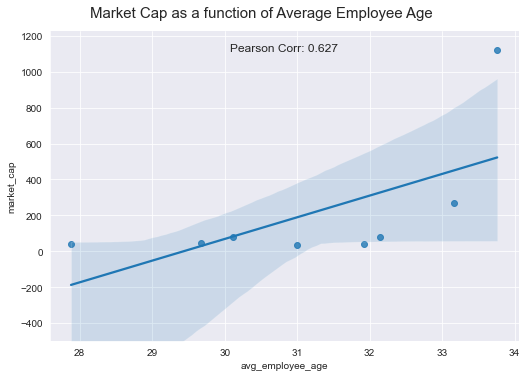

In [63]:
sns.lmplot(x='avg_employee_age', y='market_cap', data=final_df, aspect=1.5)
plt.ylim(bottom=-500)
plt.title('Pearson Corr: ' + str(round(final_df.corr().at['avg_employee_age', 'market_cap'],3)), pad=-20)
plt.suptitle('Market Cap as a function of Average Employee Age', size=15, y=1.04);

We continue with the relationship between the number of employees each company, and their average targets. Note that we dropped `AIA` for this analysis, as it has 0 employees (which is obiously wrong).

As the plot implies, the relationship seems to have a 2nd order polinomial relationship, where there is an advantage for more employees untill a certain point, followed by efficiency decrease afterwards. We can think of it this way - Having a too small amount of workers is inefficient, and having too much workers is inefficient (less supervision ability etc). This is a actually a familiar pattern in economics.<br>
**Remark** - here we compared employee "targets" to productivity. Though, we don't know what "targets" really stands for, we assumed its better to have more.

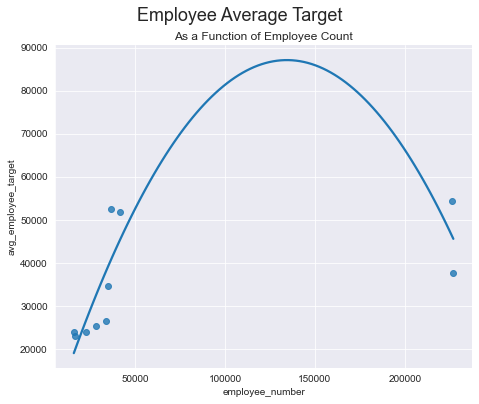

In [64]:
sns.lmplot(x='employee_number', y='avg_employee_target', data=final_df.drop(1), order=2, ci=None, height=5.2, aspect=1.3)
plt.suptitle('Employee Average Target', size=18, y=1.07)
plt.title('As a Function of Employee Count');

### Conclusion
Even though the dataset we got was not optimal (nor the information about it), we managed to squeeze some information out of it - most was visualized. As the reader might have noticed, we tend do explain the rational behind our decisions and any feedback regarding them will be welcomed.<br>
There were almost no correlations between the various numeric features, but often there were some clear distribution patterns. We faced some missing values and outliers, which were handled with caution because partial data can be still valueable. Moreover, it can always be filtered out when necessary. (and have been through this project).

We have reached the end of the project. The following section is optional and features an additional analysis regarding the connection between `customers` and `companies`, but this time mostly from the customer's side.

## 13. Additional Analysis (Optional reading)
Let us merge `companies_agg` again, but with `customers` this time.

In [65]:
final_df_2 = customers.merge(companies_agg, on='company')
final_df_2.head()

,age,gender,email,provider,business_nature,company,position,payment_method,targets,first_name,last_name,target_mean,target_sd,target_count,sampled_employees,avg_employee_age,avg_employee_target,avg_target_count,common_payment_method
0,32,Male,123.com,123,Insurance,AIA,財務策劃,A,25973.69;25777.53,Noah,Brittin,25875.610000,138.706066,2,17,33.76,47506.96,3.06,A
1,27,Male,gmail.com,gmail,Insurance,AIA,保險從業員,C,20663.90;21287.92;20578.57;21064.76,Thomas,Kerne,20898.787500,335.003661,4,17,33.76,47506.96,3.06,A
2,38,Male,hotmail.com,hotmail,Insurance,AIA,Agent,A,53673.65,Norman,Bloeser,53673.650000,NaN,1,17,33.76,47506.96,3.06,A
3,57,Male,gmail.com,gmail,Professional Services / Consultation,AIA,資深區域經理,M,88045.98;89205.93,Gilbert,Bloeser,88625.955000,820.208511,2,17,33.76,47506.96,3.06,A
4,25,Male,gmail.com,gmail,Insurance,AIA,Finacial planner,A,17846.35;17937.26;17750.30,Fredrick,Araque,17844.636667,93.491775,3,17,33.76,47506.96,3.06,A


Consider the following *KDE plot*, showing the residuals from `target_mean` to `avg_employee_target`. Namely, the difference between each employee's target to the company's average, based on the employee age.<br>
We can see most residuals lay around 0, especially within ages 20-30. There are a few abnormal residuals between ages 30-50 and higher residuals at 50+.

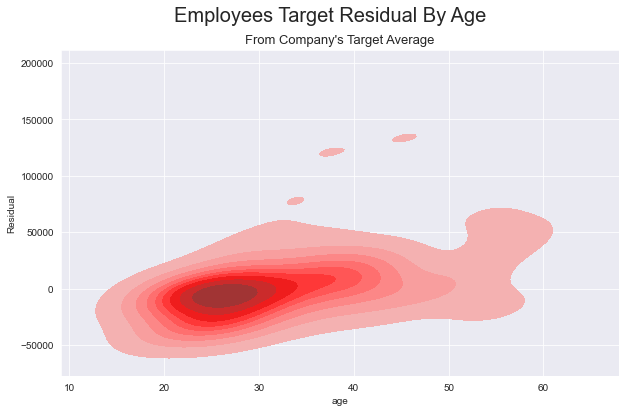

In [66]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='age', y=(final_df_2['target_mean']-final_df_2['avg_employee_target']), data=final_df_2, fill=True, color='r')
plt.ylabel('Residual')
plt.suptitle('Employees Target Residual By Age', size=20)
plt.title('From Company\'s Target Average', size=13);

Next, we boxplot the residuals vs (email) `provider`. We considered only the top 3 providers mentioned in the previous items, as no paranormal behaviour was spotted along other emails and due to plotting simplicity. We can see most residuals are around 0 with a few outlies withing employees using `gmail` and `hotmail`, but there are more employees with those providers, enhancing the chance for outliers. Hence, we conclude no significant connection between the email provider and targets. 

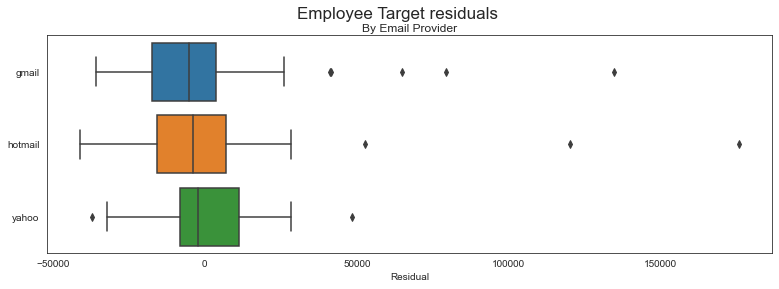

In [67]:
sns.set_style('white')
plt.figure(figsize=(13,4))
sns.boxplot(y='provider', x=(final_df_2['target_mean']-final_df_2['avg_employee_target']), data=final_df_2[final_df_2.provider.isin(['gmail', 'hotmail', 'yahoo'])])
plt.xlabel('Residual')
plt.ylabel('')
plt.suptitle('Employee Target residuals', size=17)
plt.title('By Email Provider', size=12, pad=3.5);

Notice that there are more `business_nature` unique values than companies, implying that `business_nature` relates to the employees business nature, rather than the company's.

In [68]:
print(f'There are {final_df_2.business_nature.nunique()} unique buisness natures, while there are only {final_df_2.company.nunique()} unique companies.')

There are 17 unique buisness natures, while there are only 11 unique companies.


Looking at the different business natures for each `company`, we can most certainly confirm it's related to the employees themselves. (for full lookup, remove the `head()` method).

In [69]:
final_df_2.groupby('company')['business_nature'].value_counts().head(11)

company                 business_nature                     
AIA                     Insurance                               12
                        Professional Services / Consultation     2
                        Bank / Finance                           1
                        Other                                    1
                        Retail / Wholesale                       1
Cathay Pacific Airways  Airlines                                12
HAECO                   Airlines                                 6
                        Other                                    1
HKT                     Communications                          13
                        Retail / Wholesale                       2
                        IT                                       1
Name: business_nature, dtype: int64

# Thank you